# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [251]:
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


1. Load the ./data/college_completion.csv data with Pandas.

In [252]:
# 1. Load the ./data/college_completion.csv data with Pandas.
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv',low_memory=False)

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [253]:
# 2. What are are the dimensions of the data? How many observations are there?
# What are the variables included? Use .head() to examine the first few rows of data.
print(df.shape, '\n') # List the dimensions of df
print("The dimensions are 3798 rows by 63 columns.", '\n')
print("There are 3798 observations.", '\n')
print("The variables are:", '\n')
print(df.columns.tolist(), '\n') # List of the variables
df.head()

(3798, 63) 

The dimensions are 3798 rows by 63 columns. 

There are 3798 observations. 

The variables are: 

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_aft

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate control and level. Describe the patterns you see.

In [254]:
# 3. Cross tabulate control and level. Describe the patterns you see.
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Describe the patters you see.
- It appears that, out of all of the 4-year colleges, most are private not-for-profit
- It appears that, out of all of the 2-year colleges, most are public.
- It appears that there are more 4-year colleges than 2-year colleges.
- It appears that most colleges are public, and the least amount of colleges are private for-profit.

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.

<Axes: >

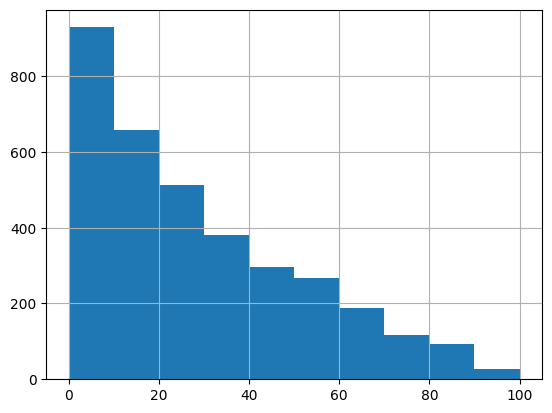

In [255]:
# 4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
df['grad_100_value'].hist()

<Axes: ylabel='Density'>

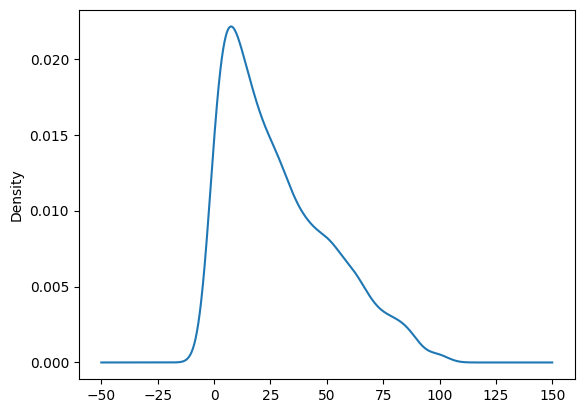

In [256]:
df['grad_100_value'].plot.density() # kernel density plot for grad_100_value

<Axes: >

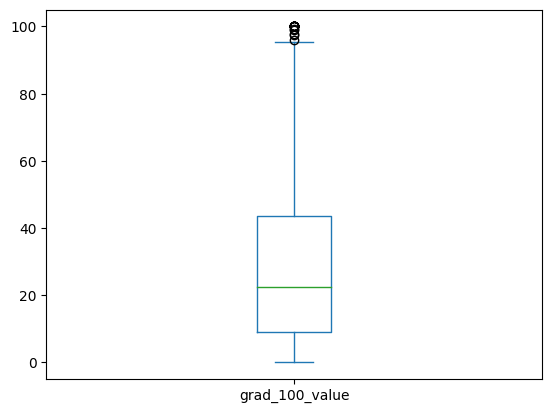

In [257]:
df['grad_100_value'].plot.box() # box plot for grad_100_value

In [258]:
df['grad_100_value'].describe() # statistical description for grad_100_value

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

<Axes: ylabel='Density'>

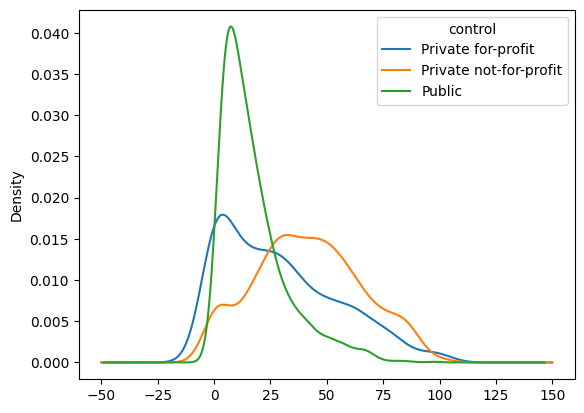

In [259]:
# 5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see.
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?
group_by = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density() # create a grouped kernel density plot by control for grad_100_value

<Axes: ylabel='Density'>

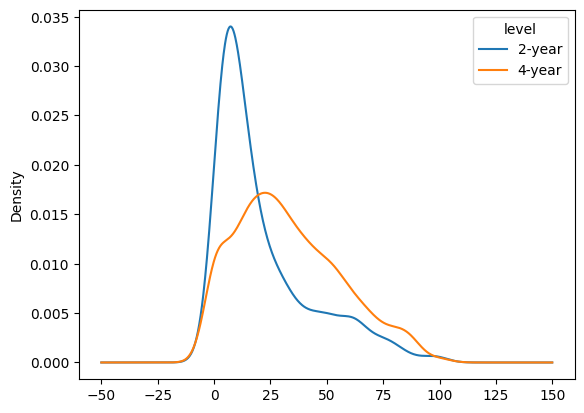

In [260]:
group_by = 'level'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density() # create a grouped kernel density plot by level for grad_100_value

In the two graphs above, it is observed that most 2-year colleges have a graduation rate around 15%. Most 4-year colleges have a graduation rate of around 25%, but the graduation rates are more varied than 2-year colleges. This is the same for public universities that have a high concentration of graduation rates around 15%. Then, private for-profit colleges tend to have a lower graduation rate than private not-for-profit colleges.

In [261]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level.
var = 'grad_100_value'
group = 'level'
df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [262]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by control.
var = 'grad_100_value'
group = 'control'
df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

In [263]:
df['levelXcontrol']=df['level']+', '+df['control'] # create new variable that interacts level and control

<Axes: ylabel='Density'>

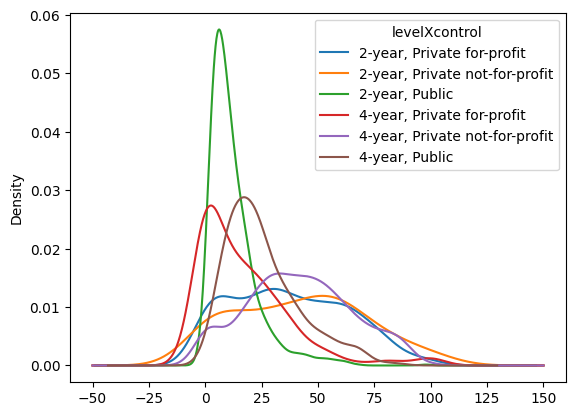

In [264]:
group_by = 'levelXcontrol'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density() # create a grouped kernel density plot by the new levelXcontrol variable for grad_100_value

4-year private not-for-profit institutions appear to have the best graduation rates.

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.

<Axes: ylabel='Density'>

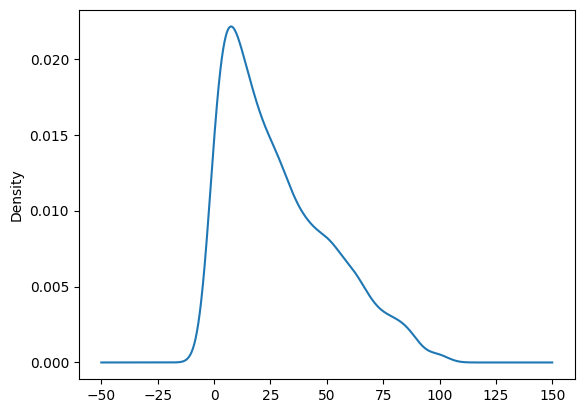

In [265]:
df['grad_100_value'].plot.density() # kernel density plot for aid_value

<Axes: ylabel='Density'>

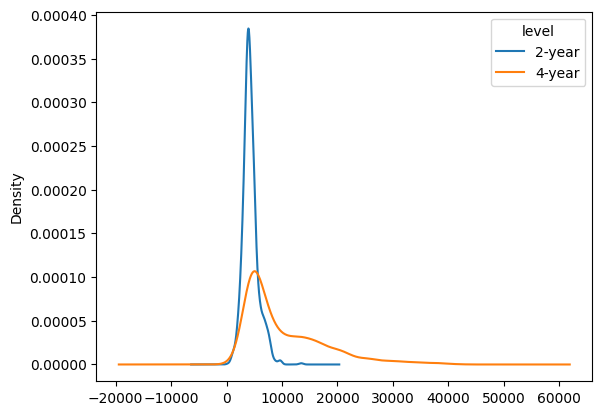

In [266]:
group_by = 'level'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density() # create a grouped kernel density plot by level for aid_value

<Axes: ylabel='Density'>

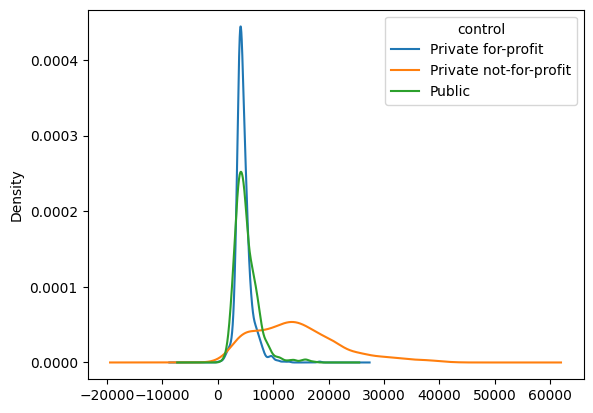

In [267]:
group_by = 'control'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density() # create a grouped kernel density plot by control for aid_value

In [268]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by control.
var = 'aid_value'
group = 'control'
df.loc[:,[group,var]].groupby(group).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [269]:
# Use groupby and .describe to make grouped calculations of statistical descriptions ofaid_value by level.
var = 'aid_value'
group = 'level'
df.loc[:,[group,var]].groupby(group).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

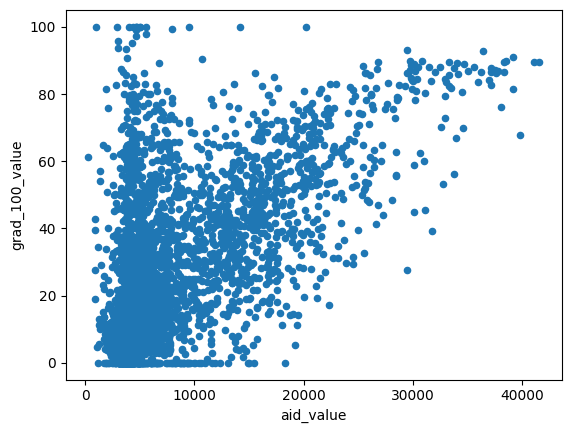

In [270]:
df.plot.scatter(y='grad_100_value',x='aid_value') # scatterplot of grad_100_value by aid_value

It appears that the lower the aid value, the lower the graduation rate. Also, there seems to be almost a linear correlation between aid value increasing and graduation rate increasing.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

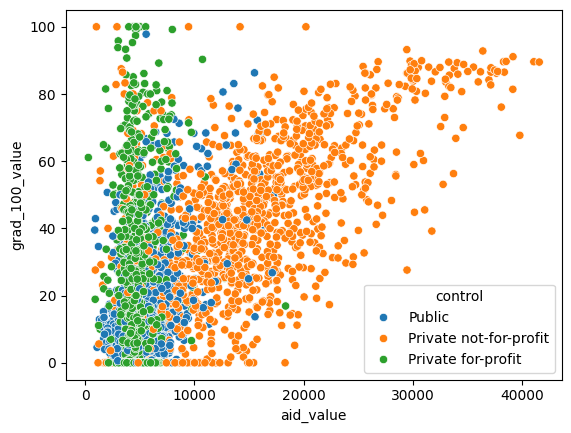

In [271]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control') # create a scatter plot by control for aid_value and grad_100_value

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

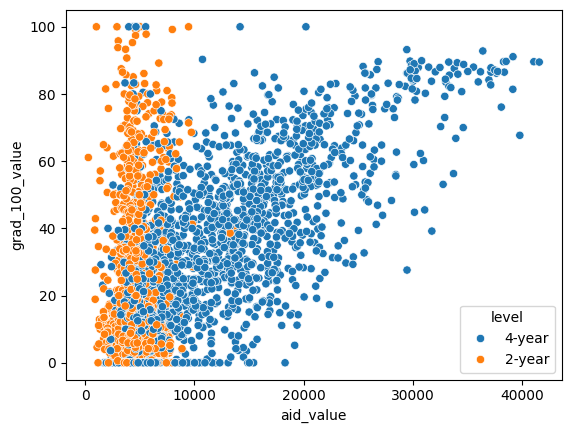

In [272]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level') # create a scatter plot by level for aid_value and grad_100_value

It appears that private not-for-profit and 4-year colleges have more of a linear correlation with aid_value and grad_100_value, so as the aid value increases at those schools so does the graduation rate. Public, private for-profit, and 2-year colleges look like their aid value doesn't change.

The shape of the two graphs above shows that most 2-year colleges provide aid around 500 dollars, while 4-year colleges are more varied. Also, most private for-profit and public colleges provide aid around 500 dollars, while private not-for-profit colleges are more varied.

Private not-for-profit instituations appear to have to best graduation rates. Also, 4-year institutions appear to have the best graduation rates.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

I picked the medicare current beneficiary survey data.

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

Yes, the data dictionary documents how missings are handled, and it describes it for numerica variables. They handled it based on the guidelines specified in the American Association for Public Opinion Research (AAPOR) and OMB. Also, it describes the possible values and missing value codes for catergorical variables. It describes them as "Unknown" or "Inapplicable/Missing". It describes each of the variables concisely, but it is in a disorganized text file.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

ACC_MCCOSTS is an interesting variable because it means the level of satisfaction of the person's medical costs. That could be interesting to look at it against Medicare-Medicaid dual eligibility. ADM_OP_MDCD is an interesting variable because it is  Medicare-Medicaid dual eligibility, which could be cool to look at against medicare status. ACC_MCQUALTY is an interesting variable because it is the quality of medical care for the last year. This is a numeric variable, and it would be cool to look at how it compares to Medicare-Medicaid dual eligibility.

In [273]:
import numpy as np
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # import seaborn
med_df = pd.read_csv('/content/visualization/assignment/data/puf2021_1_fall.csv',low_memory=False) # load csv

# rename variables
# change numeric to strings if applicable
# remove missing values
# add the string names if applicable

In [274]:
med_df = med_df.rename(columns = {'ACC_MCCOSTS':'medical_costs',
                    'ADM_OP_MDCD':'dual_eligibility',
                    'ACC_MCQUALTY':'qual_of_care'}) # renaming chosen variables to more understandable names
print(med_df.loc[0:5,('dual_eligibility', 'qual_of_care', 'medical_costs')],'\n') # printing first 6 rows of chosen variables

   dual_eligibility qual_of_care medical_costs
0                 1            1             2
1                 1            1             3
2                 1            1             3
3                 1            2             2
4                 2            2             3
5                 1            1             5 



In [275]:
dual = med_df['dual_eligibility'] # created a variable for the dual_eligibility column
dual.unique() # display all of the unique values in the dual_eligibility column

# First, I am going to change the numbers to the kind of dual eligibility they each mean.
dual = dual.replace(1, 'Nondual') # replace all 1's in this column to be 'Nondual'

In [276]:
dual = dual.replace(2, 'Full dual') # replace all 2's in this column to be 'Full dual'

In [277]:
dual = dual.replace(3, 'Partial dual') # replace all 3's in this column to be 'Partial dual'

In [278]:
dual = dual.replace(4, 'QMB dual') # replace all 4's in this column to be 'QMB dual'

In [279]:
print(dual.unique(), '\n') # display all of the unique values in the dual variable
dual.value_counts() # display the count of each of the unique values in the dual variable

['Nondual' 'Full dual' 'Partial dual' 'QMB dual'] 



Nondual         10111
Full dual        1835
QMB dual          437
Partial dual      400
Name: dual_eligibility, dtype: int64

In [280]:
med_df['dual_eligibility'] = dual # change the unclean dual_eligibility column to the cleaned dual variable
del dual # deleting dual variable

print(med_df.loc[0:5,'dual_eligibility'],'\n') # printing first 6 rows of dual_eligibility column

0      Nondual
1      Nondual
2      Nondual
3      Nondual
4    Full dual
5      Nondual
Name: dual_eligibility, dtype: object 



In [281]:
qual = med_df['qual_of_care'] # created a variable for the qual_of_care column
qual.unique() # display all of the unique values in the qual_of_care column

# Second, I am going to clean the missing values in this column
qual = qual.replace({'D', 'R'}, np.nan) # replace all D's and R's to NaN because they are 'Don't Know' and 'Refused', so I considered them missing values

In [282]:
qual = pd.to_numeric(qual, errors='coerce') # convert the qual variable to numeric

In [283]:
print(qual.unique(), '\n')# display all of the unique values in the qual variable
qual.value_counts() # display the count of each of the unique values in the qual variable

[ 1.  2.  3.  5.  4. nan] 



1.0    6395
2.0    5488
3.0     480
5.0     234
4.0     137
Name: qual_of_care, dtype: int64

In [284]:
med_df['qual_of_care'] = qual # change the unclean qual_of_care column to the cleaned qual variable
del qual # deleting qual variable

print(med_df.loc[0:5,'qual_of_care'],'\n') # printing first 6 rows of qual_of_care column

0    1.0
1    1.0
2    1.0
3    2.0
4    2.0
5    1.0
Name: qual_of_care, dtype: float64 



In [285]:
cost = med_df['medical_costs'] # created a variable for the medical_costs column
cost.unique() # display all of the unique values in the medical_costs column

# Lastly, I am going to clean the missing values in this column
cost = cost.replace({'D', 'R'}, np.nan) # replace all D's and R's to NaN because they are 'Don't Know' and 'Refused', so I considered them missing values

In [286]:
cost = pd.to_numeric(cost, errors='coerce') # convert the cost variable to numeric

cost.unique() # display all of the unique values in the medical_costs column

array([ 2.,  3.,  5.,  1.,  4., nan])

In [287]:
print(cost.unique(), '\n')# display all of the unique values in the cost variable
cost.value_counts() # display the count of each of the unique values in the cost variable

[ 2.  3.  5.  1.  4. nan] 



2.0    6661
1.0    4212
3.0    1160
5.0     381
4.0     274
Name: medical_costs, dtype: int64

In [288]:
med_df['medical_costs'] = cost # change the unclean medical_costs column to the cleaned cost variable
del cost # deleting cost variable

print(med_df.loc[0:5,'medical_costs'],'\n') # printing first 6 rows of medical_costs column

0    2.0
1    3.0
2    3.0
3    2.0
4    3.0
5    5.0
Name: medical_costs, dtype: float64 



4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

<Axes: ylabel='qual_of_care'>

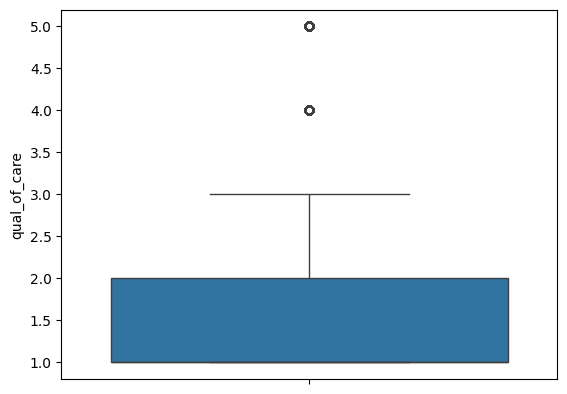

In [289]:
sns.boxplot(med_df['qual_of_care']) # making box plot for the numeric variable, qual_of_care

<Axes: ylabel='medical_costs'>

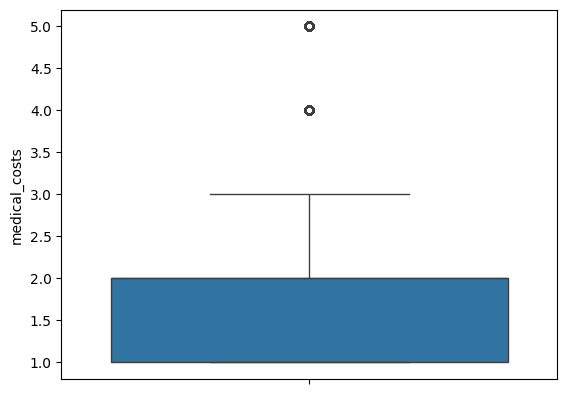

In [290]:
sns.boxplot(med_df['medical_costs']) # making box plot for the numeric variable, medical_costs

<Axes: ylabel='dual_eligibility'>

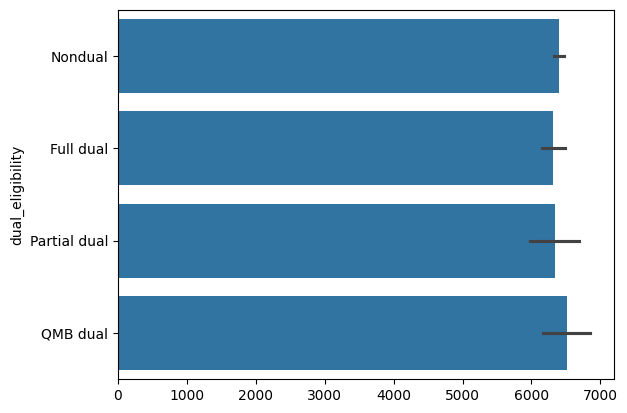

In [291]:
sns.barplot(med_df['dual_eligibility']) # making bar graph for the categorical variable, dual_eligibility

There are a lot of outliers in the numeric box plots. Clearly most people rated their quality of care as a 1 or 'Very Satisfied'. People who rated their quality of care as a 4 or 5 or 'Very Dissatisfied' or 'No experience' are outliers. Medical costs has the same outliers as quality of are. Then, dual eligibility doesn't look like it has any outliers.

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

<Axes: xlabel='medical_costs', ylabel='Count'>

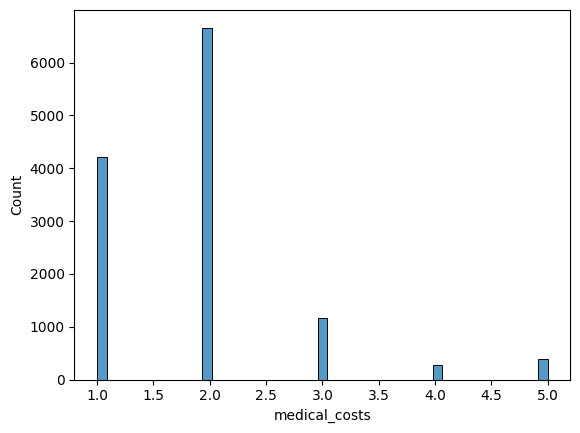

In [292]:
sns.histplot(data=med_df,x='medical_costs') # making histogram for medical_costs